# In this section i will show you how tensorflow blog .
***Import tensorflow library ***

In [25]:
# Import tensorflow
import tensorflow as tf  # Tensorflow shortcut tf
print(tf.__version__)   # Install version check 6h

2.18.0


# Make a tensor data for basic operation .

## build the model with keras API
** We can use tensorflow keras module for build a neural network**


In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# General sequential model
model = Sequential([
    Dense(16, activation='relu', input_shape=(10,)),  # Input 10 dimensian layer
    Dense(8, activation='relu'),                      # Hidden layer
    Dense(1, activation='sigmoid')                     # Output layer binary (classification)
])

# Model compile: loss funtion, optimizer, Matrix
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# To understand: model structure
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

# Dataset load and traning

In [2]:
import numpy as np

# Dumy data: 10 future 100 sample
x_train = np.random.rand(100, 10).astype(np.float32)
# Damy data : 0/1 (100 label)
y_train = np.random.randint(0, 2, size=(100, 1)).astype(np.float32)

# Model training 20 epochs , batch size 8
model.fit(x_train,y_train,epochs=20,batch_size=8,verbose=1 ) # Summary


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4730 - loss: 0.7088
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4517 - loss: 0.7099 
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5693 - loss: 0.6784 
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5454 - loss: 0.6813 
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5310 - loss: 0.6868 
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6197 - loss: 0.6640 
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6114 - loss: 0.6661 
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6551 - loss: 0.6646 
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6097 - loss: 0.6692 
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4666 - loss: 0.6776 
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.6516 
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

# model evoluate and prediction.

In [3]:
# Dumy valuation data
x_val = np.random.rand(20, 10).astype(np.float32)
y_val = np.random.randint(0, 2, size=(20, 1)).astype(np.float32)


test_loss, test_acc = model.evaluate(x_val, y_val, verbose=0)
print("Validation Loss:", test_loss)
print("Validation Accuracy:", test_acc)


# Prediction with new data
x_new = np.random.rand(5, 10).astype(np.float32)
preds = model.predict(x_new)
print("Predictions (probabilities):", preds)


Validation Loss: 0.7511711716651917
Validation Accuracy: 0.3499999940395355
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Predictions (probabilities): [[0.7010284 ]
 [0.45438161]
 [0.4451174 ]
 [0.5129367 ]
 [0.59828144]]


## Now we are work with real dataset
***Dataset = Breast Cancer Wisconsin***

In [4]:
# Import breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# Load the dataset
data = load_breast_cancer()
x = data.data.astype(np.float32)       # teblar feature (shape=(569, 30))
y = data.target.astype(np.float32)     # label(0-1)

# Devided witl validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42
)  # 80% 20% validation

# tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(buffer_size=100).batch(16)  # batch size (16)

val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_ds = val_ds.batch(16)

# Model define dence layer / sequential
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)),  # input 30 dimensen
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                  # Output binary classification
])

# Model compile: optimizer, loss, metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Model structure check
model.summary()

# Model training
history = model.fit(train_ds,epochs=25,validation_data=val_ds,verbose=1) # 25 epoch

# Validation loss, acc
# Changed x_test to x_val to use the validation dataset for evaluation
test_loss, test_acc = model.evaluate(x_val, y_val, verbose=0)
print("Validation Loss:", test_loss)
print("Validation Accuracy:", test_acc)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4087 - loss: 46.0154 - val_accuracy: 0.9386 - val_loss: 0.1932
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8879 - loss: 0.7747 - val_accuracy: 0.9211 - val_loss: 0.1935
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9064 - loss: 0.4470 - val_accuracy: 0.9386 - val_loss: 0.1693
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9160 - loss: 0.3997 - val_accuracy: 0.9386 - val_loss: 0.1590
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9036 - loss: 0.4318 - val_accuracy: 0.9123 - val_loss: 0.4734
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9017 - loss: 0.4361 - val_accuracy: 0.9035 - val_loss: 0.6086
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.5661 - val_accuracy: 0.9474 - val_loss: 0.1530
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9095 - loss: 0.4004 - val_accuracy: 0.9561 - val_los

# Lets check this loss and acc with visualization

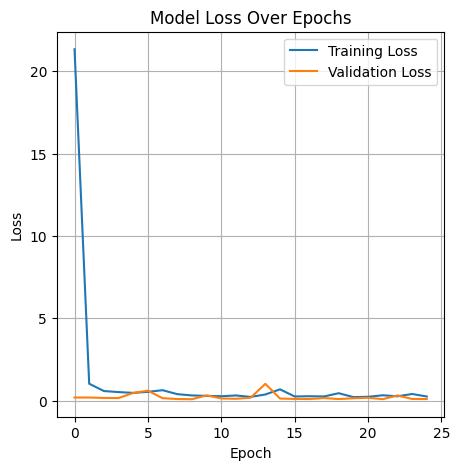

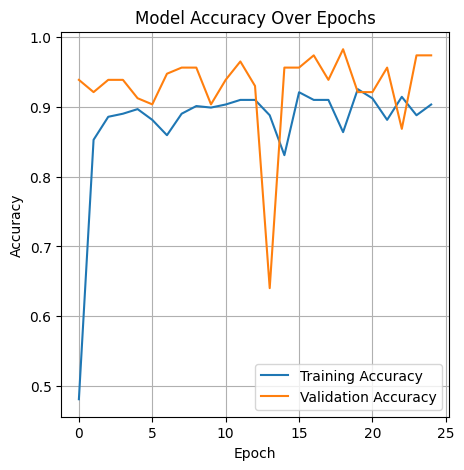

In [5]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='Training Loss')           # training loss per epoch
plt.plot(history.history['val_loss'], label='Validation Loss')      # validation loss per epoch
plt.title('Model Loss Over Epochs')                                 # title of the plot
plt.xlabel('Epoch')                                                 # x-axis label
plt.ylabel('Loss')                                                  # y-axis label
plt.legend()                                                        # show legend
plt.grid(True)                                                      # add grid for readability
plt.show()                                                          # display the loss plot

# Plot training & validation accuracy values
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')    # training accuracy per epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # validation accuracy per epoch
plt.title('Model Accuracy Over Epochs')                             # title of the plot
plt.xlabel('Epoch')                                                  # x_axis label
plt.ylabel('Accuracy')                                              # y_axis label
plt.legend()                                                        # show legend
plt.grid(True)                                                      # add grid for readability
plt.show()                                                          # display the accuracy plot


# Let's discuss confusion matrix & Classification report

In [6]:
# Import confusion matrix & Classification library
from sklearn.metrics import confusion_matrix, classification_report

y_prob = model.predict(x_val)                       # prediction probability for per sample
y_pred = (y_prob > 0.5).astype(np.int32).reshape(-1)  # Thresold 0.5; target 0/1
y_true = y_val.astype(np.int32)  # Ground truth label

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_true, y_pred, target_names=data.target_names)
print("\nClassification Report:\n", report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Confusion Matrix:
 [[42  1]
 [ 2 69]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        43
      benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Model save process

In [7]:
model.save('breast_cancer_model.h5')  # .h5 file saved
(print("Model save succesfull"))


Model save succesfull


# Work with random  dummy data .tfrecord

In [11]:
import tensorflow as tf

# Read file path (Example, CSV/TFRecord)
filenames = tf.data.Dataset.list_files("dummy_data.tfrecord")

# Parseing funtion
def _parse_fn(example_proto):
    features = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64),
    }
    parsed = tf.io.parse_single_example(example_proto, features)
    img = tf.io.decode_jpeg(parsed["image"], channels=3)
    img = tf.image.resize(img, [224, 224]) / 255.0  # Resize and normalize
    lbl = tf.cast(parsed["label"], tf.int32)
    return img, lbl

# Make dataset and optimization
dataset = filenames.interleave(
    lambda x: tf.data.TFRecordDataset(x),  # more file add to gather
    cycle_length=4,                         # how many file read one time
    num_parallel_calls=tf.data.AUTOTUNE     #Auto tune
)
dataset = dataset.map(_parse_fn, num_parallel_calls=tf.data.AUTOTUNE)  # map operation
dataset = dataset.cache()
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.batch(32)                  # Batch size 32
dataset = dataset.prefetch(tf.data.AUTOTUNE)

# model train
# model.fit(dataset, epochs=10)


**check loss and epoch**

In [12]:
import tensorflow as tf

# Example: simple dence model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(30,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Make a dummy dataset
import numpy as np
X_train = np.random.rand(100, 30).astype("float32")
y_train = np.random.randint(0, 2, size=(100,1)).astype("float32")
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(16)

# Training loop
for epoch in range(5):
    print(f"Epoch {epoch+1}")
    for step, (x_batch, y_batch) in enumerate(train_ds):
        with tf.GradientTape() as tape:
            preds = model(x_batch, training=True)           # forward pass
            loss = loss_fn(y_batch, preds)                  # loss compute
        grads = tape.gradient(loss, model.trainable_variables)  # backward
        optimizer.apply_gradients(zip(grads, model.trainable_variables))  # Update
        if step % 10 == 0:
            print(f"  step {step}: loss = {loss.numpy():.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1
  step 0: loss = 0.7465
Epoch 2
  step 0: loss = 0.7337
Epoch 3
  step 0: loss = 0.7545
Epoch 4
  step 0: loss = 0.7548
Epoch 5
  step 0: loss = 0.7389


In [15]:
import tensorflow as tf


strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
# Model and optimizer
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

# Data load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# DIgital batch size
batch_size = 128 * strategy.num_replicas_in_sync

# Model training
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=5,
    validation_data=(x_test, y_test)
)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8335 - loss: 0.6073 - val_accuracy: 0.9454 - val_loss: 0.1886
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9511 - loss: 0.1750 - val_accuracy: 0.9571 - val_loss: 0.1412
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9644 - loss: 0.1234 - val_accuracy: 0.9680 - val_loss: 0.1090
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9737 - loss: 0.0949 - val_accuracy: 0.9696 - val_loss: 0.0993
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9794 - loss: 0.0740 - val_accuracy: 0.9716 - val_loss: 0.0966


In [16]:
import tensorflow as tf

# Mixed precision precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")
# now dence and sequential model compile

# Model define
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(1000,)),
    tf.keras.layers.Dense(1, activation="sigmoid", dtype="float32")

])

# Optimizer and compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
optimizer = mixed_precision.LossScaleOptimizer(optimizer)
# Avoid lossscale and optimizer
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# random data
import numpy as np
X = np.random.rand(200, 1000).astype("float32")
y = np.random.randint(0, 2, size=(200,1)).astype("float32")

model.fit(X, y, epochs=3, batch_size=32)


Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.5313 - loss: 1.0128
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4948 - loss: 0.8862  
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5392 - loss: 0.7484 


# Finished